## Secrets in bilibili video covers:
    Work on the videos in the bilibili hot list to take insights into the connection between the thumbnail image styles and the genres of these videos!

### Work Flow:
Pictures ->(1) Feature Vectors ->(2) Dis/Similarity Matrix ->(3) Graph ->(4) Community ->(5) Visualization ->(6) Analysis

In [129]:
import feature
import palsgraph
import networkx as nx
import numpy as np
import scipy as sc
import itertools
import matplotlib.pyplot as plt
import feature2graph
from scipy.spatial.distance import cdist,squareform
# import area for every member to add their source code

In [130]:
# parameters
#categories = ['animal','animation','dance','fashion','food','game','kichiku','knowledge','life','music','tech']
categories = ['animation','fashion','knowledge',]
num_train_per_cat =50
num_pictures = len(categories)*num_train_per_cat
data_path = './M3/'
Iteration='2'

#### (1）HOG and Yolov3 to extract features
Input: pictures or their paths. Output: Feature Vectors possibly

In [131]:
# load data
image_paths,labels,genres = feature.get_image_paths(data_path, categories, num_train_per_cat)
# get feature vectors using different methods
features = feature.get_feature_hog(image_paths)   # using hog to extract 

# read data from files 
objects,areas,scores = feature2graph.read_features(num_pictures)
# remove 'hard' pictures
objects_new,areas_new,scores_new,index = feature2graph.remove_hard(objects, areas,scores)
#print(objects)
labels = feature2graph.remove_labels(index,labels)
num_pictures -= len(index)
# calculate vectors
elements = ['person','traffic','animal','package','sports','food','furniture','tech','other']
vectors = feature2graph.get_vectors(objects_new, elements,areas_new,scores_new)
vectors = feature2graph.normalize(vectors)
print(vectors)


[[1.0, 0.0, 0.06974780838904186, 0.051336526058622746, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.09780185017216167, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.6006677122520145, 0.0, 1.0, 0.0, 0.0, 0.0, 0.6746991189313489, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.5805261258960941, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.2837365409129678, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.35964118149156943, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.7828078853118486, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.

#### (2) Covariance/ Euclidean Distance/Gaussian to get Dis/Similarity Matrix
Input: featurer vectors.Output: dis/simlarity matrix.

if step(1) has directly got the output, then jump to the next step.

In [132]:
# using Euclidean distance to calculate distance/similarity
# distance = feature.get_distance(features,num_pictures) 

distance = feature.get_distance(vectors,num_pictures)
print(distance)

[[0.         1.36674964 1.29690635 ... 0.08660367 0.08660367 0.08660367]
 [1.36674964 0.         0.09780185 ... 1.41421356 1.41421356 1.41421356]
 [1.29690635 0.09780185 0.         ... 1.34683388 1.34683388 1.34683388]
 ...
 [0.08660367 1.41421356 1.34683388 ... 0.         0.         0.        ]
 [0.08660367 1.41421356 1.34683388 ... 0.         0.         0.        ]
 [0.08660367 1.41421356 1.34683388 ... 0.         0.         0.        ]]


#### (3) Threshold or some other ways
Input: dis/similarity matrix.
Output: different ways to describe a graph.

some code in Kal's homework may help to find the appropriate threshold.(show the histogram of the data,and then test)

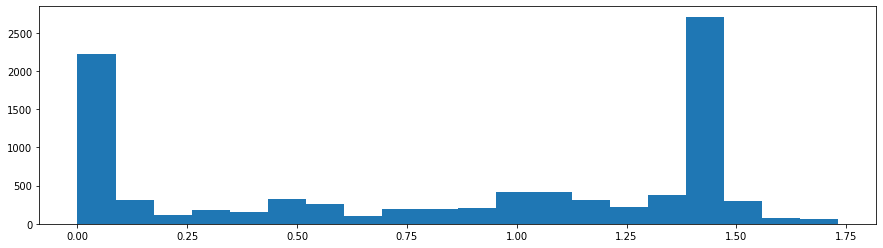

In [133]:
# homework code to visualize similarity matrix in histogram
plt.figure(figsize=(15, 4))
_ = plt.hist(squareform(distance), bins=20)


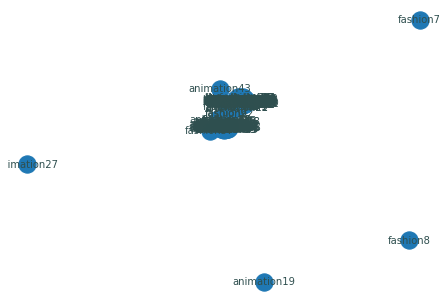

In [134]:
threshold = 0.8  # waiting to be tested
adjmat = feature.get_graph(distance,threshold)
#feature.write_edgestxt(num_pictures,adjmat)   # write edges information into a txt file
# help to visualize graph for a simple look
G = palsgraph.make_graph(adjmat, labels=labels, show_singletons=True)
nx.draw(G, with_labels=True,font_size=10,font_color='darkslategray',edge_color='gray')

**Perform the clustering**

#### (4) Different Community Detection Algorithms
Input: graph. Output: community in a graph


**Lode data from file**


In [135]:
# #Bruce: using data from the edge.tat file


# edges = np.array([(str(x), str(y)) for (x, y) in np.genfromtxt('../Documents/GitHub/CD-02/edges.txt', delimiter=' ', dtype=np.integer)])

# # Convert the names of the vertices into matrix indices, and vice versa
# idx2node = dict(list(enumerate(np.unique(edges.reshape(-1,)))))
# node2idx = {str(v): k for k, v in idx2node.items()}
# adjlabels=labels
# #adjlabels = [idx2node[idx] for idx in range(len(idx2node))]

# size = len(idx2node.keys())
# adjmat = np.zeros((size, size))
# for i in range(edges.shape[0]):
#     adjmat[node2idx[edges[i,0]], node2idx[edges[i,1]]] = adjmat[node2idx[edges[i,1]], node2idx[edges[i,0]]] = 1
    
# adjG = palsgraph.make_graph(adjmat, labels=adjlabels, show_singletons=False)

**process data from the part above provided by Tingyu**

In [136]:
idx2node=dict(list(enumerate( labels)))
node2idx = {str(v): k for k, v in idx2node.items()}
adjlabels=labels


##### Girvan-Newman
Girvan-Newman accepts an unweighted graph as input. Hence, we load the file  𝚎𝚍𝚐𝚎𝚜.𝚝𝚡𝚝 , which contains a list of unweighted edges, and translate it into an adjacency matrix.


In [137]:
from networkx.algorithms.community.centrality import girvan_newman

comp = girvan_newman(G)

gn_communities = [c for c in itertools.islice(comp, 1)][0]

#### MCL algorithm


In [138]:
import markov_clustering as mc

def restore_labels(communities, idx2node):
    _communities = []
    for community in communities:
        _communities.append([idx2node[idx] for idx in community])
    return _communities

matrix = nx.to_scipy_sparse_matrix(G)

result = mc.run_mcl(matrix)
mcl_communities = mc.get_clusters(result)
mcl_communities = restore_labels(mcl_communities, idx2node)

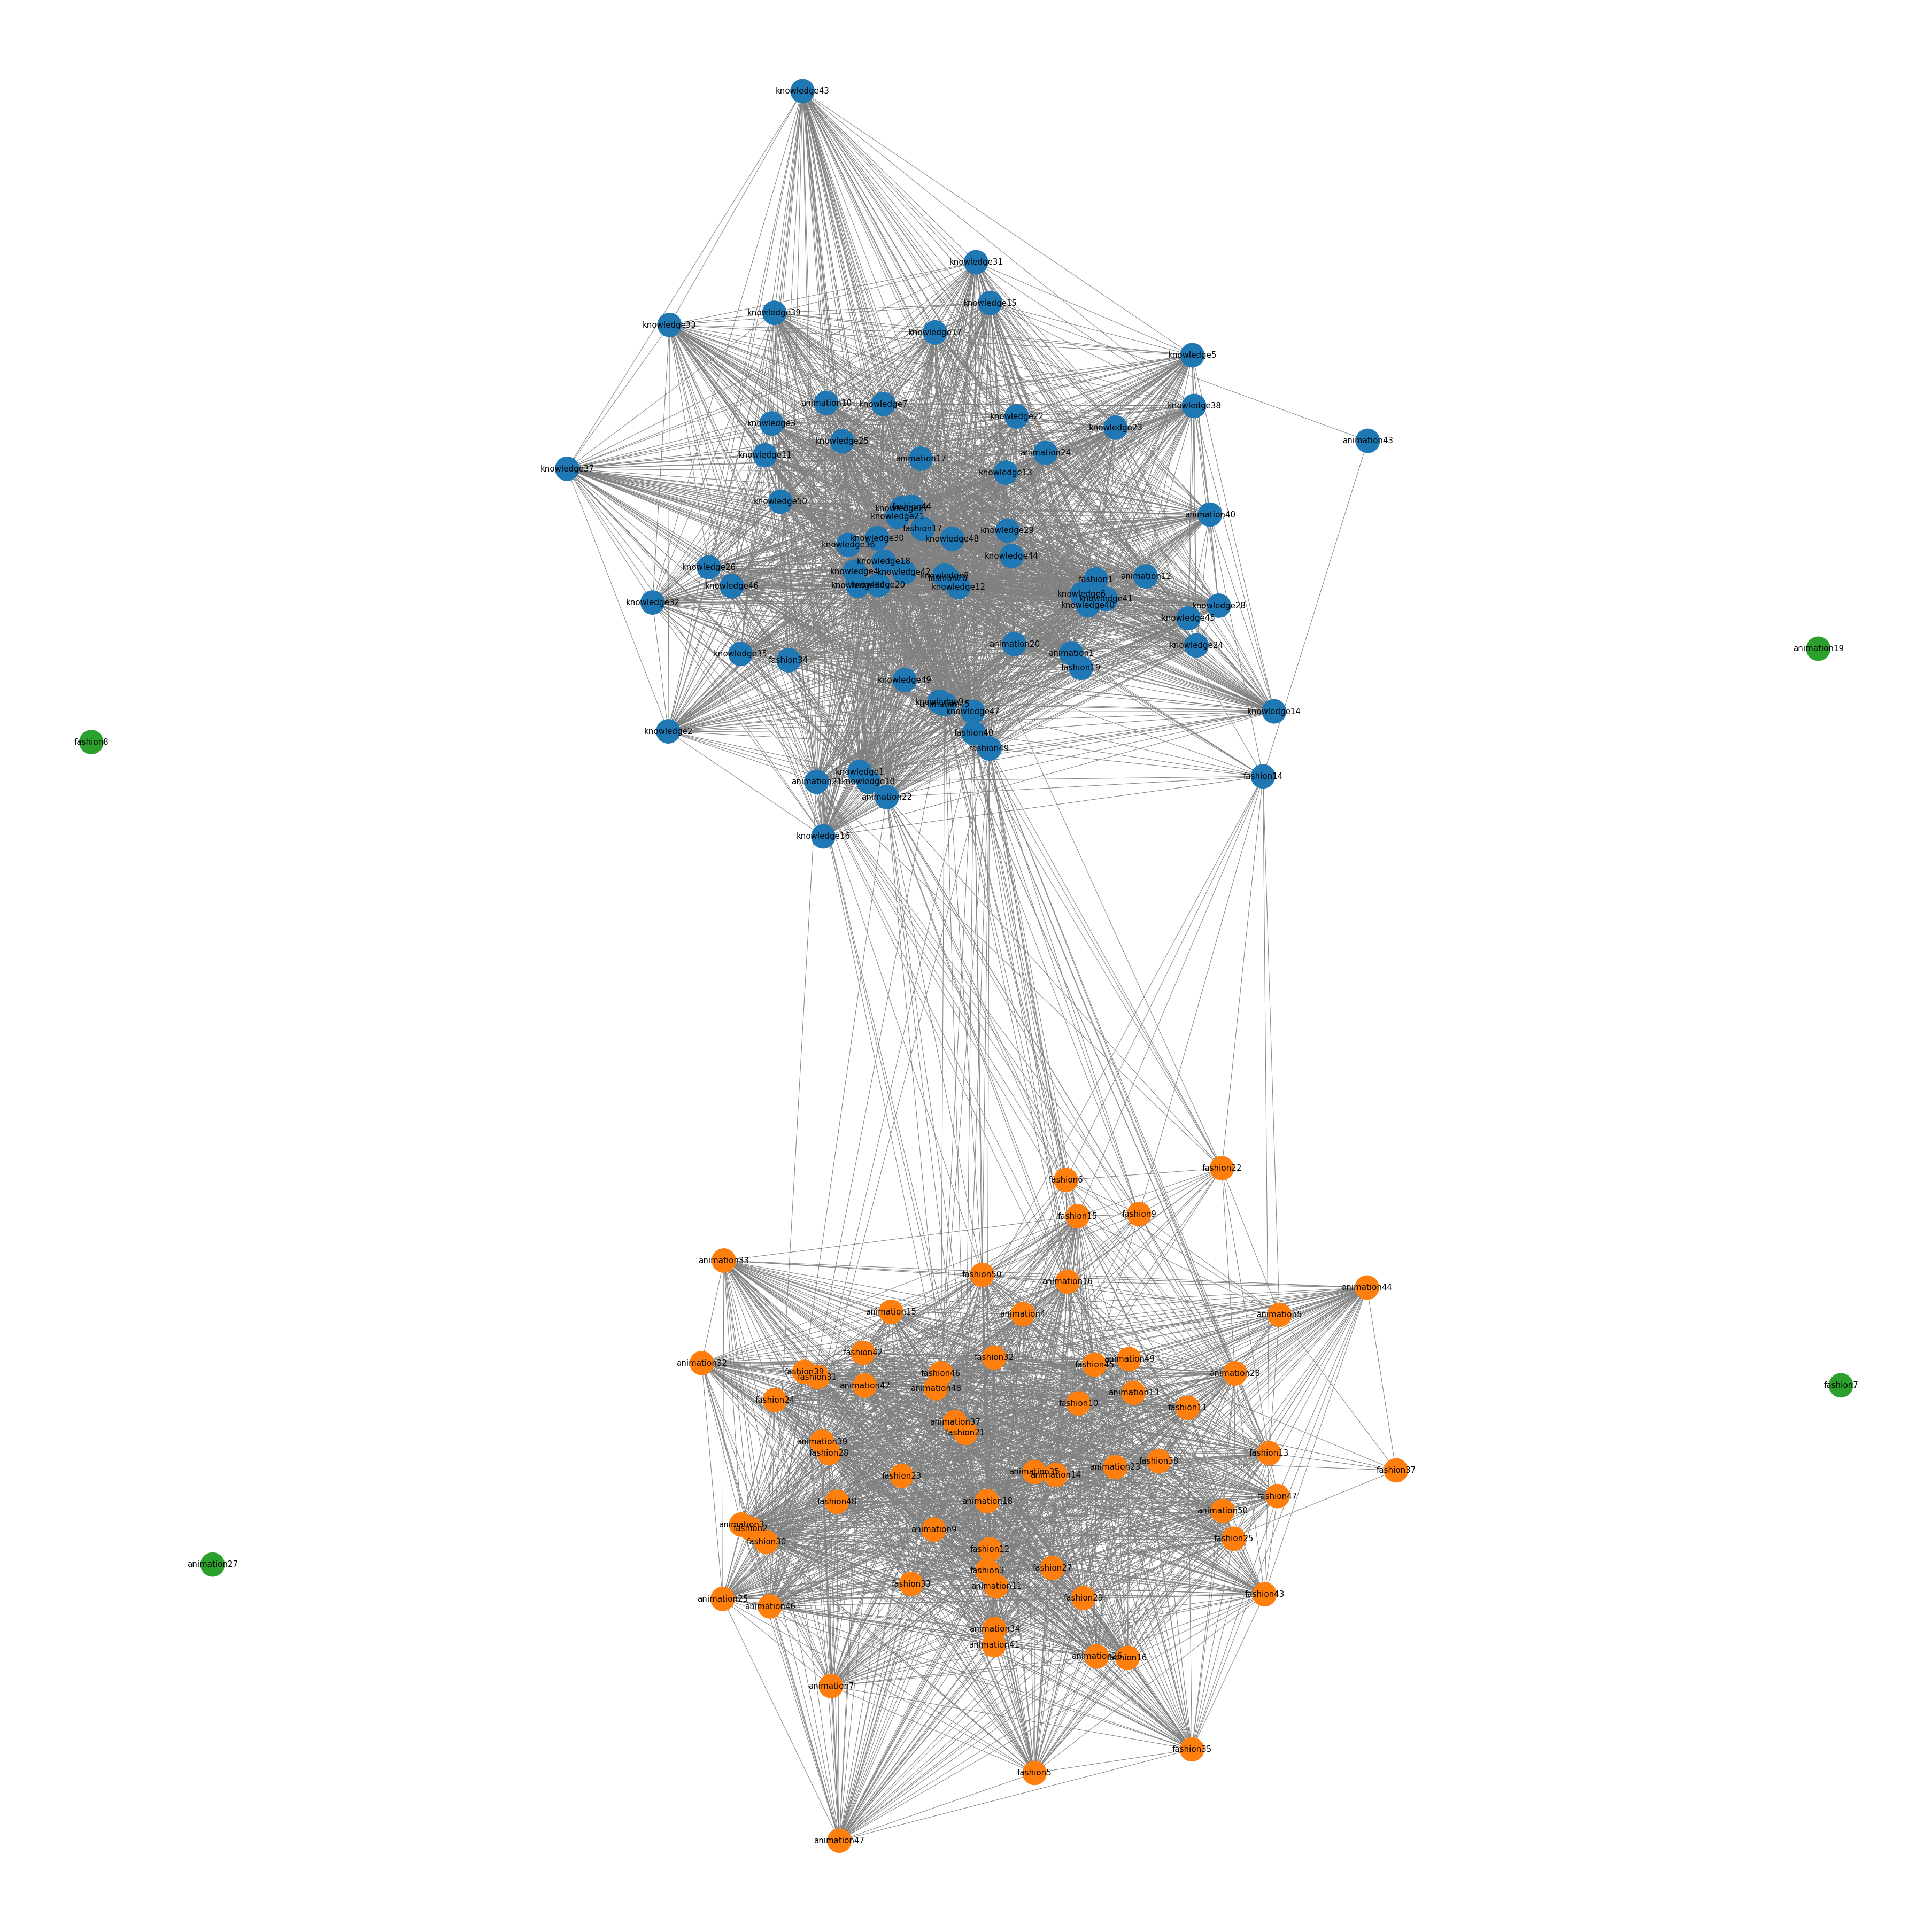

In [139]:
pos = palsgraph.getpos(G, mcl_communities)
color_map = palsgraph.gen_colormap(G, mcl_communities)
plt.figure(figsize=(50, 50))
nx.draw(G, pos=pos, with_labels=True, node_size=2000,font_size=15,node_color=color_map, edge_color='grey')
plt.savefig('./figures/Iteration'+Iteration+'/MCL.jpg')
plt.show()

##### Single-Linkage Clustering
using the code prof.Kal provides 

input: distance matrix and node label list

In [140]:
#Bruce: using the distance Tingyu provided as distance matrix, labels as the label list
from scipy import cluster  
from scipy.cluster import hierarchy 
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import squareform

linkages= linkage(squareform(distance), 'ward')


**Visualize dendogram**

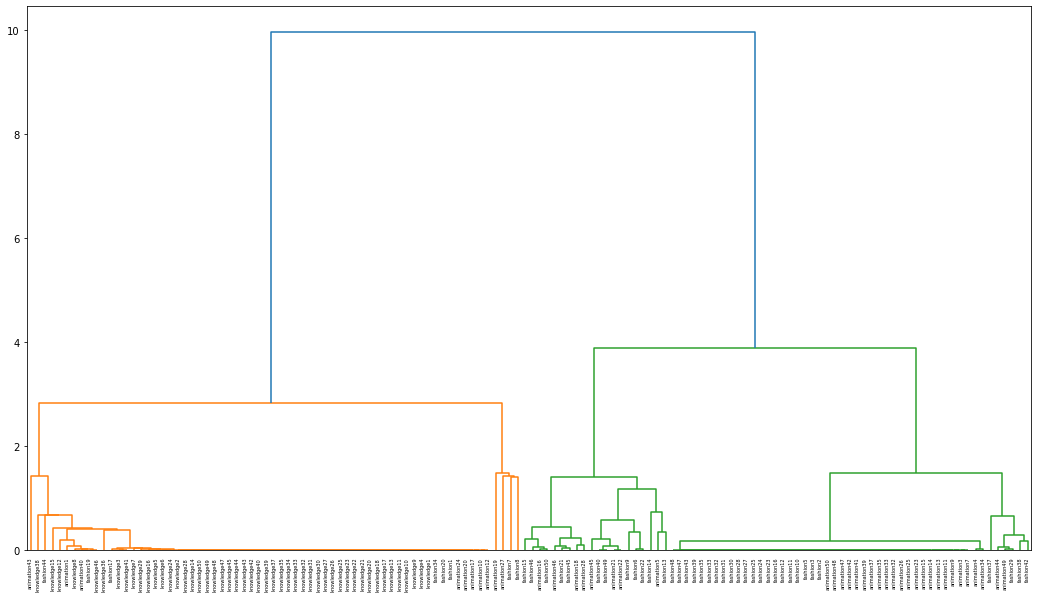

In [141]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(18, 10))
dn = dendrogram(linkages, labels=labels)
plt.savefig('./figures/Iteration'+Iteration+'/simple_linkage.jpg')
plt.show()

In [120]:
hierarchy.dendrogram(linkages,labels = labels)
label = cluster.hierarchy.cut_tree(linkages,height=1.75)
label = label.reshape(label.size,)
from sklearn import decomposition as skldec
pca = skldec.PCA(n_components = 0.95)    #选择方差95%的占比
pca.fit(distance)   #主城分析时每一行是一个输入数据
result = pca.transform(distance)  #计算结果
plt.figure()  #新建一张图进行绘制
plt.scatter(result[:, 0], result[:, 1], c=label, edgecolor='k') #绘制两个主成分组成坐标的散点图
# for i in range(result[:,0].size):
#     plt.text(result[i,0],result[i,1],labels)     #在每个点边上绘制数据名称
# x_label = 'PC1(%s%%)' % round((pca.explained_variance_ratio_[0]*100.0),2)   #x轴标签字符串
# y_label = 'PC1(%s%%)' % round((pca.explained_variance_ratio_[1]*100.0),2)   #y轴标签字符串
# plt.xlabel(x_label)    #绘制x轴标签
# plt.ylabel(y_label)    #绘制y轴标签

ValueError: Dimensions of Z and labels must be consistent.

##### Clique Perculation
needed input: unweighted graph 

In [14]:
#Bruce:use unweighted graph G
from networkx.algorithms.community.kclique import k_clique_communities

def get_communities(C):
    communities = []
    nodes = []
    for community in list(C):
        communities.append(list(community))
        nodes.extend(list(community))
    _G = G.copy()
    nodes_to_remove = [node for node in _G.nodes() if node not in nodes]
    for node in nodes_to_remove:
        _G.remove_node(node)        
    return communities, _G

C = k_clique_communities(G, 5)
cp_communities, cp_G = get_communities(C)

**visualize clique**

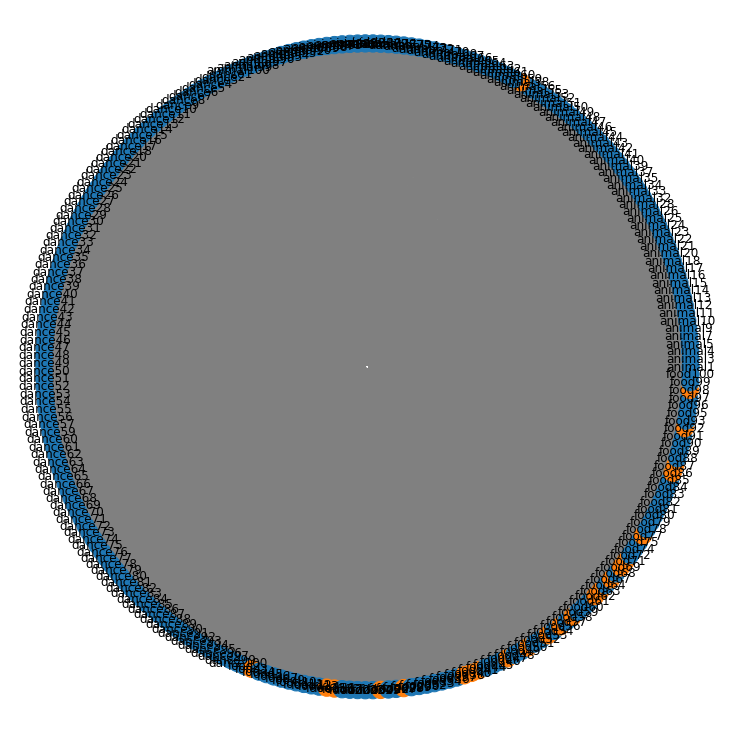

In [15]:
plt.figure(figsize=(10, 10))
color_map = palsgraph.gen_colormap(cp_G, cp_communities)
nx.draw(cp_G, pos=nx.circular_layout(cp_G), node_color=color_map, edge_color='grey', with_labels=True)

#### (5) Visualization
Input: community above. Output: different visualizations

**visualization of Girvan-Newman algorithm**

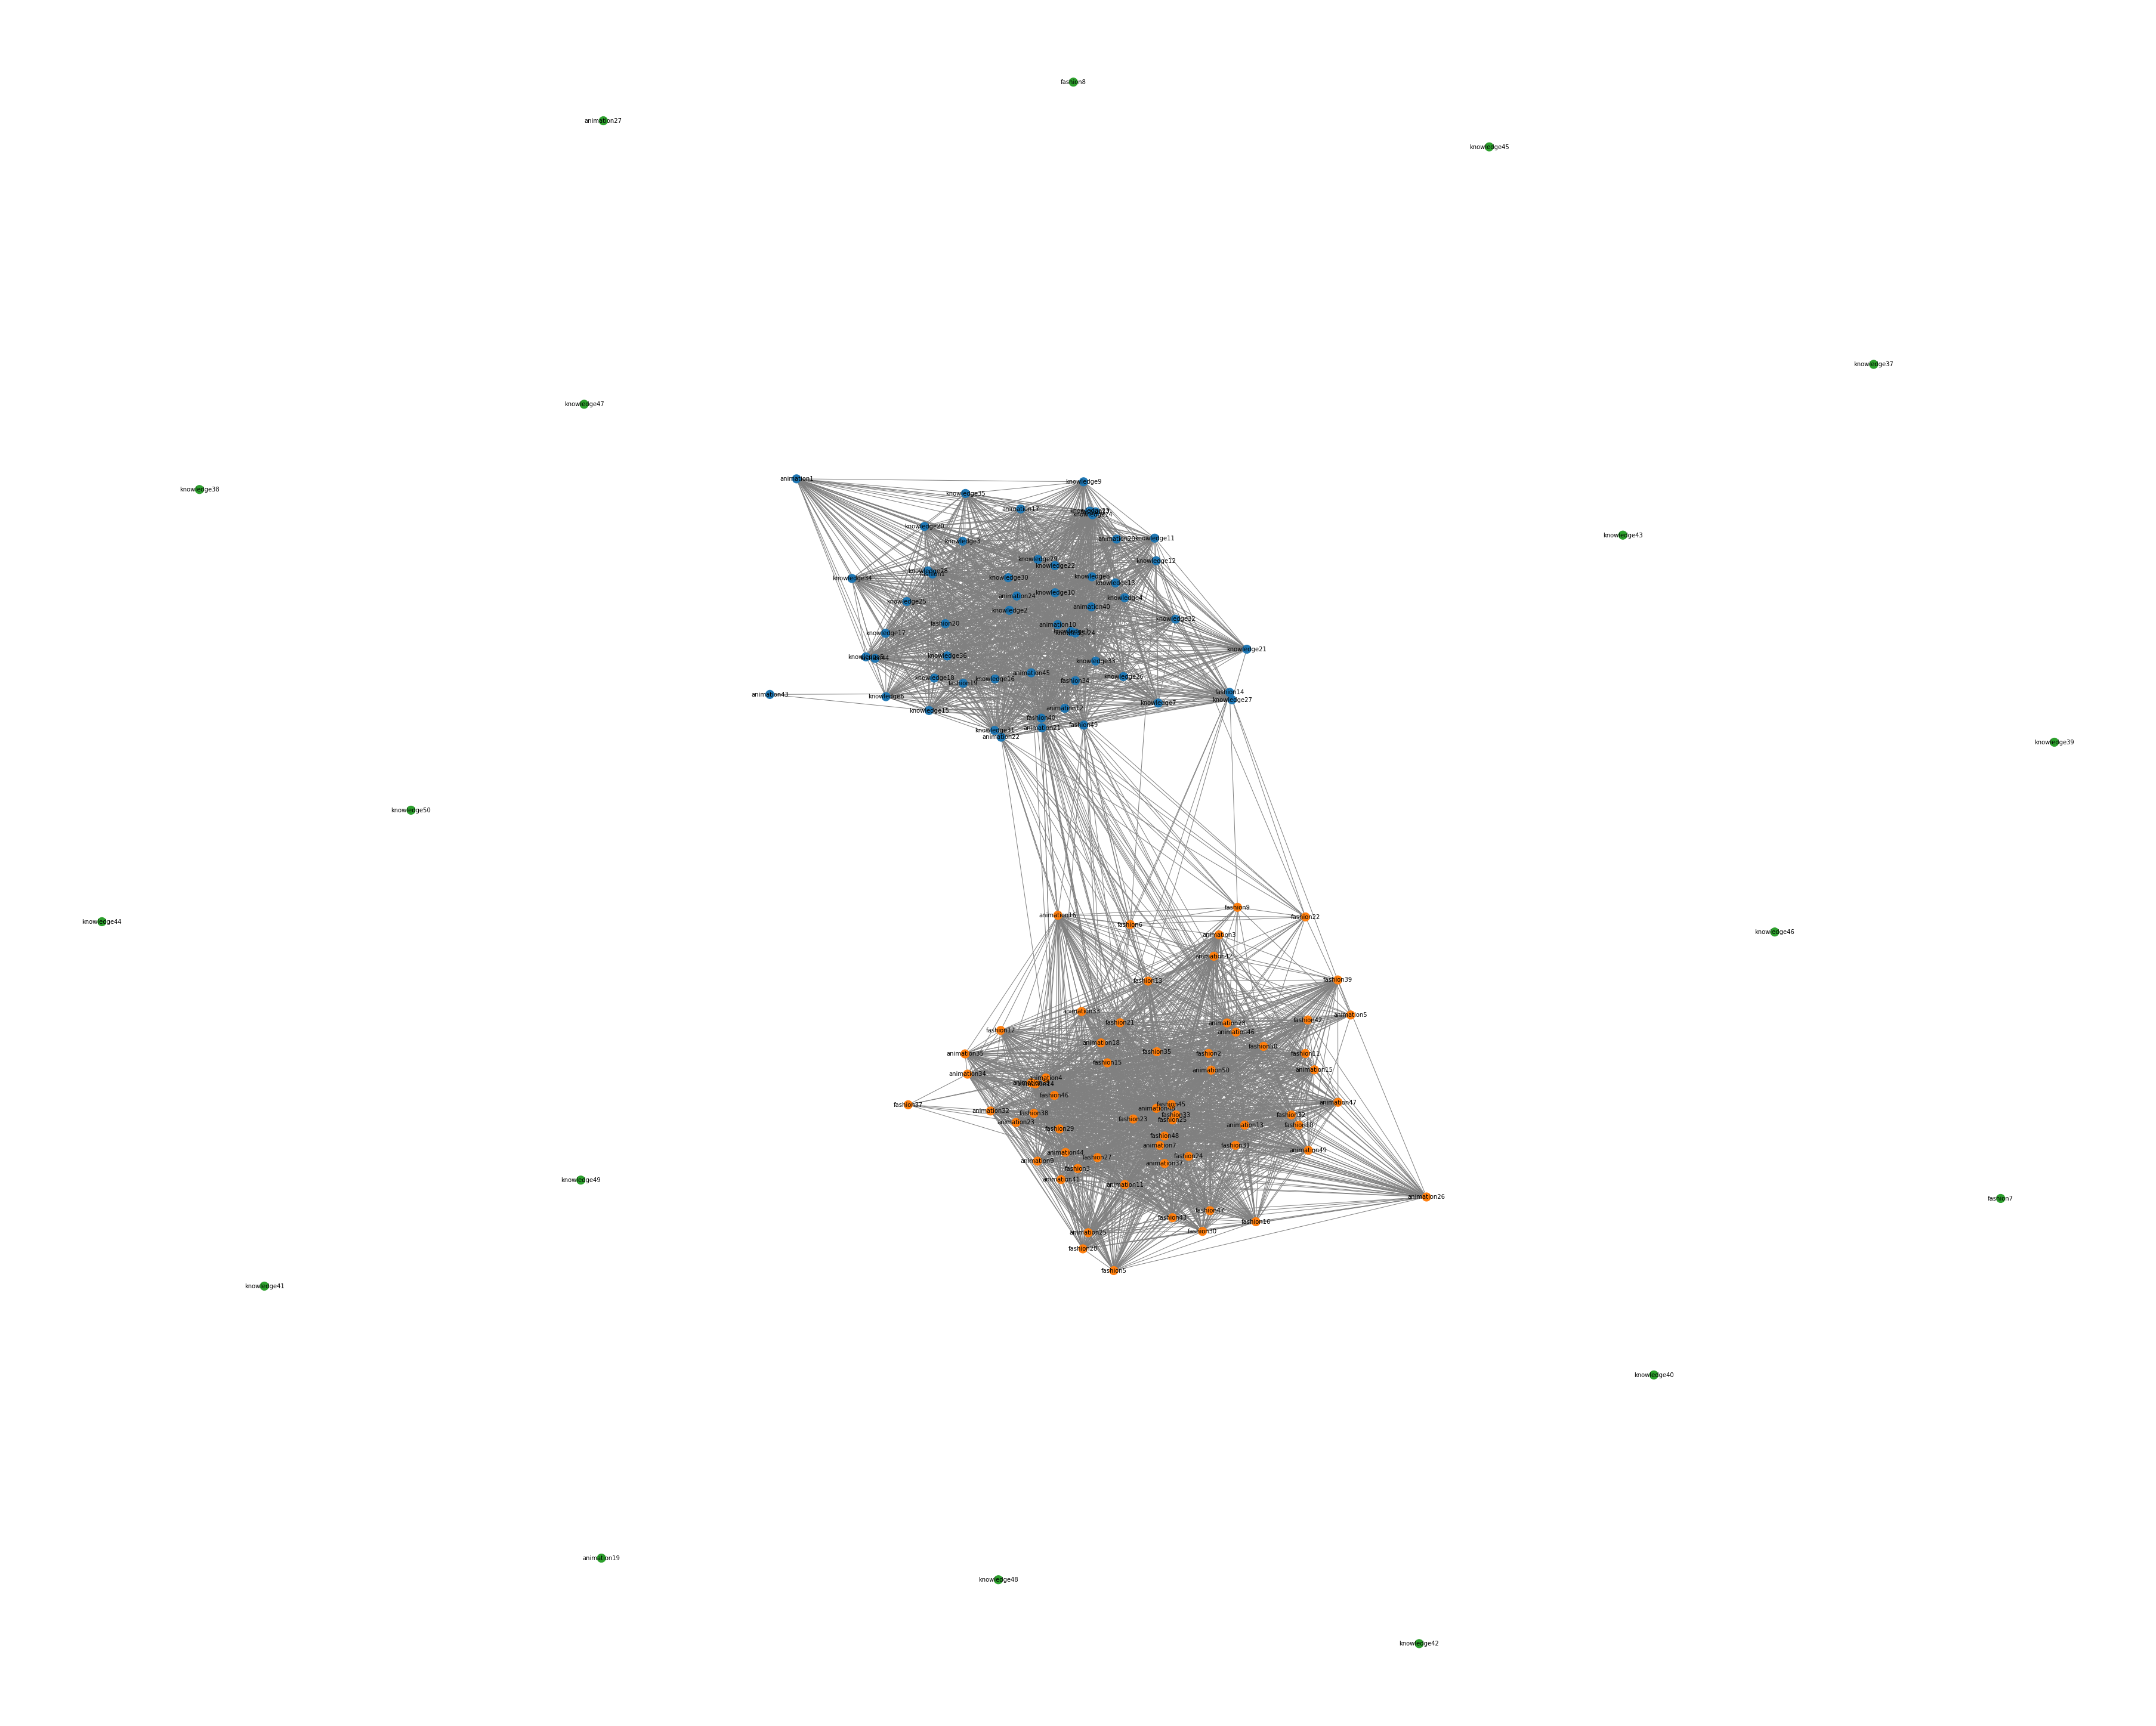

In [121]:
pos = palsgraph.getpos(G, gn_communities)
color_map = palsgraph.gen_colormap(G, gn_communities)
plt.figure(figsize=(50, 40))
nx.draw(G,node_size=200, pos=pos, with_labels=True, node_color=color_map, font_size=10,font_color='black', edge_color='grey')
plt.savefig('./figures/Iteration'+Iteration+'/GN.jpg')
plt.show()

#### (6) Analysis 
(I am not sure about whether this part needs any code or something else to help)